 Logistic Regression

You  are  given  a  categorical  dataset –“Heart_Disease.csv.” Load  the dataset into a DataFrame. Considering the “TenYearCHD”column as the target variable, perform the  following tasks:

1.Explore the  “Heart_Disease.csv” dataset,  identify  the  null  values  and  fill them with the mean value of their respective columns

2.Split  the  data  into  test  and  train  parts  using train_test_split()function in 80:20 ratio (80% train, 20% test)

3.Perform scaling of numeric data using the StandardScaler()function

4.Build a Logistic  regression model using the test dataset and test the model using the test dataset

5.Print the classification report of the model

6.Calculate the confusion matrix and plot the same using a heatmap

7.Calculate and print the accuracy score of the model

8.Print the decision boundary for θ= 0,  θ= 1 and 2


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,accuracy_score
import sys
import seaborn as sns

1.Explore the “Heart_Disease.csv” dataset, identify the null values and fill them with the mean value of their respective columns

In [ ]:
df=pd.read_csv('/content/Heart_Disease.csv')
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [ ]:
df.tail()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0


In [ ]:
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [ ]:
df2=df.apply(lambda x: x.fillna(x.mean()),axis=0)
print(df2.isnull().sum(),"\n")

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64 



In [ ]:
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


2.Split the data into test and train parts using train_test_split()function in 80:20 ratio (80% train, 20% test)

In [ ]:
x=df2.drop(['TenYearCHD'],axis=1)
y=df2['TenYearCHD']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=0)

In [ ]:
print("After splitting the data-")
print('size of input train data:',sys.getsizeof(x_train))
print('size of input test data:',sys.getsizeof(x_test))
print('size of output train data:',sys.getsizeof(y_train))
print('size of output testdata:',sys.getsizeof(y_test))

After splitting the data-
size of input train data: 433936
size of input test data: 108560
size of output train data: 54256
size of output testdata: 13584


3.Perform scaling of numeric data using the StandardScaler()function

In [ ]:
sc = StandardScaler()
x_train =sc.fit_transform (x_train)
x_test =sc.transform(x_test)
x_train=pd.DataFrame(x_train,columns=x.columns)
x_test=pd.DataFrame(x_test,columns=x.columns)

4.Build a Logistic regression model using the test dataset and test the model using the test dataset

In [ ]:
model=LogisticRegression(C=1.0, solver='liblinear', multi_class='ovr')
model.fit(x_train,y_train)

LogisticRegression(multi_class='ovr', solver='liblinear')

In [ ]:
y_pred=model.predict(x_test)


5.Print the classification report of the model

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92       710
           1       0.82      0.07      0.12       138

    accuracy                           0.85       848
   macro avg       0.83      0.53      0.52       848
weighted avg       0.84      0.85      0.79       848



6.Calculate the confusion matrix and plot the same using a heatmap

In [ ]:
from sklearn.metrics._plot.confusion_matrix import confusion_matrix
confmat=confusion_matrix(y_test,y_pred)


confusion matrix is:
 [[708   2]
 [129   9]]


Text(33.22222222222222, 0.5, 'predicted label')

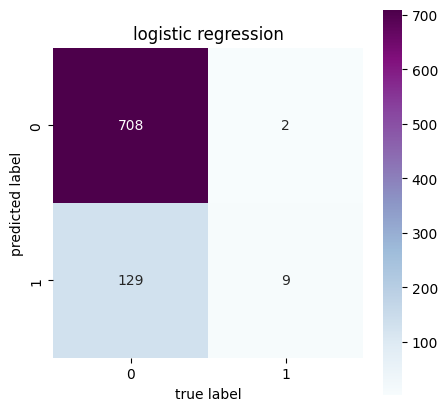

In [ ]:
plt.figure(figsize=(5,5))
plt.title("logistic regression")
sns.heatmap(confmat,square=True,cmap='BuPu',annot=True,fmt='d')
print('confusion matrix is:\n',confmat)
plt.xlabel('true label')
plt.ylabel('predicted label')

7.Calculate and print the accuracy score of the model

In [ ]:
print('Accuracy: ',accuracy_score(y_test,y_pred))
print('Accuracy in percentage:', round(100*accuracy_score(y_test,y_pred)),"%")

Accuracy:  0.8455188679245284
Accuracy in percentage: 85 %


8.Print the decision boundary for θ= 0, θ= 1 and 2

In [ ]:
print(model.intercept_ )
print(model.coef_ )

[-1.98766421]
[[ 0.21541643  0.52071547 -0.00372666  0.01750053  0.26913697  0.01696847
   0.08443569  0.16687756  0.05451109  0.09068734  0.2901454  -0.09035171
   0.03552546 -0.01975149  0.12593722]]
